## Flight price prediction(EDA + Feature Engineering)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_df=pd.read_excel('Data_Train.xlsx')
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
test_df=pd.read_excel('Test_set.xlsx')
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [6]:
final_df=pd.concat([train_df,test_df])
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [7]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [8]:
final_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.7+ MB


In [10]:
## Feature Engineering Process
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

In [11]:
final_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [12]:
# Or use Lambda function for this deed

In [13]:
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB


In [15]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [16]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [17]:
final_df['Arrival_Time'].str.split(' ').str[0]

,Arrival_Time
0,01:10
1,13:15
2,04:25
3,23:30
4,21:35
...,...
2666,20:25
2667,16:55
2668,04:25
2669,19:15


In [18]:
## OR use lambda function
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [19]:
final_df.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0
Price,2671


In [20]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1]

In [21]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10


In [22]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)

In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Year             13354 non-null  int64  
 13  Arrival_hour     13354 non-null  int64  
 14  Arrival_min      13354 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 2.1+ MB


In [24]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [25]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [26]:
final_df['Dept_hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dept_min']=final_df['Dep_Time'].str.split(':').str[1]
final_df['Dept_hour']=final_df['Dept_hour'].astype(int)
final_df['Dept_min']=final_df['Dept_min'].astype(int)
final_df.drop('Dep_Time',axis=1,inplace=True)

In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Arrival_hour     13354 non-null  int64  
 12  Arrival_min      13354 non-null  int64  
 13  Dept_hour        13354 non-null  int64  
 14  Dept_min         13354 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 2.1+ MB


In [28]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [29]:
 final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [30]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [31]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  float64
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Arrival_hour     13354 non-null  int64  
 12  Arrival_min      13354 non-null  int64  
 13  Dept_hour        13354 non-null  int64  
 14  Dept_min         13354 non-null  int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 2.1+ MB


In [33]:
final_df['duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [34]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [35]:
final_df[final_df['duration_hour']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [36]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)

In [37]:
final_df['duration_hour']=final_df['duration_hour'].astype(int)

In [38]:
final_df.drop('Duration',axis=1,inplace=True)

In [39]:
final_df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897.0,24,3,2019,1,10,22,20,2


In [40]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [42]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [43]:
final_df.shape

(13351, 15)

In [44]:
final_df.drop('Route',axis=1,inplace=True)

In [45]:
final_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7


In [46]:
pd.get_dummies(final_df,columns=['Airline','Source','Destination','Additional_Info'],drop_first=True,dtype=int)

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour,...,Destination_5,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9
0,0.0,3897.0,24,3,2019,1,10,22,20,2,...,1,0,0,0,0,0,0,0,1,0
1,2.0,7662.0,1,5,2019,13,15,5,50,7,...,0,0,0,0,0,0,0,0,1,0
2,2.0,13882.0,9,6,2019,4,25,9,25,19,...,0,0,0,0,0,0,0,0,1,0
3,1.0,6218.0,12,5,2019,23,30,18,5,5,...,0,0,0,0,0,0,0,0,1,0
4,1.0,13302.0,1,3,2019,21,35,16,50,4,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,NaN,6,6,2019,20,25,20,30,23,...,0,0,0,0,0,0,0,0,1,0
2667,0.0,NaN,27,3,2019,16,55,14,20,2,...,0,0,0,0,0,0,0,0,1,0
2668,1.0,NaN,6,3,2019,4,25,21,50,6,...,0,0,0,0,0,0,0,0,1,0
2669,1.0,NaN,6,3,2019,19,15,4,0,15,...,0,0,0,0,0,0,0,0,1,0


In [47]:
#final_df['Price'].isnull().sum()

np.int64(2670)

In [48]:
final_df.fillna(final_df['Price'].mean(),inplace=True,axis=1)

In [61]:
X=final_df.drop('Price',axis=1)
y=final_df['Price']

In [123]:
X

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,3.0,0.0,5.0,0.0,8.0,24.0,3.0,2019.0,1.0,10.0,22.0,20.0,2.0
1,1.0,3.0,0.0,2.0,8.0,1.0,5.0,2019.0,13.0,15.0,5.0,50.0,7.0
2,4.0,2.0,1.0,2.0,8.0,9.0,6.0,2019.0,4.0,25.0,9.0,25.0,19.0
3,3.0,3.0,0.0,1.0,8.0,12.0,5.0,2019.0,23.0,30.0,18.0,5.0,5.0
4,3.0,0.0,5.0,1.0,8.0,1.0,3.0,2019.0,21.0,35.0,16.0,50.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,3.0,0.0,1.0,8.0,6.0,6.0,2019.0,20.0,25.0,20.0,30.0,23.0
2667,3.0,3.0,0.0,0.0,8.0,27.0,3.0,2019.0,16.0,55.0,14.0,20.0,2.0
2668,4.0,2.0,1.0,1.0,8.0,6.0,3.0,2019.0,4.0,25.0,21.0,50.0,6.0
2669,1.0,2.0,1.0,1.0,8.0,6.0,3.0,2019.0,19.0,15.0,4.0,0.0,15.0


In [124]:
X.drop('Additional_Info',axis=1,inplace=True)

In [125]:
X.drop('Source',axis=1,inplace=True)

In [126]:
X.drop('Total_Stops',axis=1,inplace=True)

In [127]:
X

,Airline,Destination,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,3.0,5.0,24.0,3.0,2019.0,1.0,10.0,22.0,20.0,2.0
1,1.0,0.0,1.0,5.0,2019.0,13.0,15.0,5.0,50.0,7.0
2,4.0,1.0,9.0,6.0,2019.0,4.0,25.0,9.0,25.0,19.0
3,3.0,0.0,12.0,5.0,2019.0,23.0,30.0,18.0,5.0,5.0
4,3.0,5.0,1.0,3.0,2019.0,21.0,35.0,16.0,50.0,4.0
...,...,...,...,...,...,...,...,...,...,...
2666,1.0,0.0,6.0,6.0,2019.0,20.0,25.0,20.0,30.0,23.0
2667,3.0,0.0,27.0,3.0,2019.0,16.0,55.0,14.0,20.0,2.0
2668,4.0,1.0,6.0,3.0,2019.0,4.0,25.0,21.0,50.0,6.0
2669,1.0,1.0,6.0,3.0,2019.0,19.0,15.0,4.0,0.0,15.0


In [129]:
y

,Price
0,3897.000000
1,7662.000000
2,13882.000000
3,6218.000000
4,13302.000000
...,...
2666,9085.898979
2667,9085.898979
2668,9085.898979
2669,9085.898979


In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [131]:
X_train.shape

(10680, 10)

In [132]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [133]:
X_test.shape

(2671, 10)

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
score=r2_score(y_test,y_pred)
score

0.23762385033164501

In [72]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [73]:
y_predi=ridge.predict(X_test)
score=r2_score(y_test,y_pred)
score

0.23956233729634968

In [135]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_features=5)
rf.fit(X_train,y_train)

RandomForestRegressor(max_features=5)

In [136]:
y_predic=rf.predict(X_test)

In [137]:
score=r2_score(y_test,y_predic)
score

0.5870222190863236

In [138]:
from sklearn.model_selection import cross_val_score, KFold
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

In [139]:
# Define KFold with 5 splits (you can change the number)
kf = KFold(n_splits=8, shuffle=True, random_state=42)


In [140]:
# Use negative MSE (because sklearn wants higher scores, so it returns negative values)
scores = cross_val_score(rf, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert negative scores to positive MSE
mse_scores = -scores

print("MSE Scores for each fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))


MSE Scores for each fold: [6907981.26158615 6792141.38360225 7878518.89727421 7919937.66077913
 7988386.96704519 7988145.67717057 7008263.7803635  6944122.93713032]
Average MSE: 7428437.320618914


In [141]:
from sklearn.model_selection import GridSearchCV
parameter={
    'n_estimators':[10,20,30],
    #'max_features':['sqrt','log2'],
    #'max_depth':[5,10,15],
    'min_samples_split':[2,4,8],
    'bootstrap':[True,False]
}

In [142]:
ggg=GridSearchCV(rf,param_grid=parameter,cv=5,n_jobs=-1)
ggg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(max_features=5), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [143]:
ggg.best_score_

np.float64(0.6109589771541326)

In [144]:
predict=ggg.predict(X_test)
sco=r2_score(y_test,predict)
sco

0.641542881031822

### **Actual Improvement in the predictions using KFold and GridSearchCV**

In [145]:
from sklearn.metrics import r2_score

print("Train R²:", r2_score(y_train, ggg.predict(X_train)))
print("Test R²:", r2_score(y_test, y_pred))


Train R²: 0.8011683790140074
Test R²: 0.23762385033164501


<Axes: title={'center': 'Feature Importance'}>

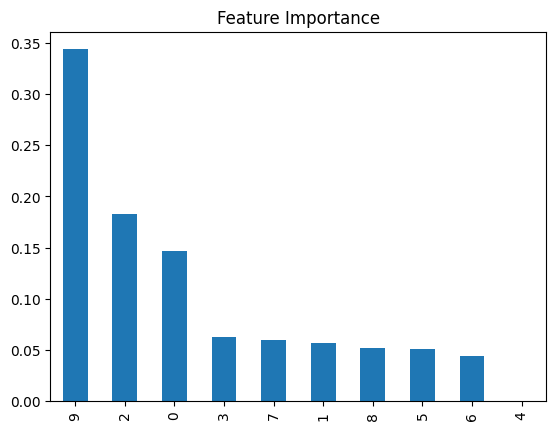

In [146]:
import pandas as pd

importances = rf.feature_importances_
features = pd.Series(importances)
features.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
